### Libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

sns.set(style="whitegrid")

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

### Data Import

In [8]:
train = pd.read_parquet("data/train_data.parquet", engine="fastparquet")
test = pd.read_parquet("data/test_data.parquet", engine="fastparquet")
df = pd.concat([train, test], axis=0).reset_index(drop=True)

## Data Preparation

In [9]:
X, y = df.iloc[:, :-2], df.iloc[:, -1:]
X_train, y_train = train.iloc[:, :-2], train.iloc[:, -1:]
X_test, y_test = test.iloc[:, :-2], test.iloc[:, -1:]

labels = df["activity"].unique()
activities_encoder = LabelEncoder()
y = activities_encoder.fit_transform(y)
y_train = activities_encoder.transform(y_train)
y_test = activities_encoder.transform(y_test)

## Feature Exploration

In [62]:
correlation_matrix = X.corr()
plt.figure(figsize=(120, 100))
cmap = sns.diverging_palette(250, 280, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, center=0, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering

In [10]:
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, test_size=0.85, random_state=42, stratify=y_train
)
X_test_sample, _, y_test_sample, _ = train_test_split(
    X_test, y_test, test_size=0.85, random_state=42, stratify=y_test
)

### Recursive Feature Elimination

In [11]:
n_features_range = np.arange(50, 400, 10)
f1_scores = []

for n_features in n_features_range:
    estimator = LogisticRegression()
    rfe = RFE(estimator, n_features_to_select=n_features)

    rfe.fit(X_train_sample, y_train_sample)
    selected_features = X.columns[rfe.support_]
    estimator.fit(X_train_sample[selected_features], y_train_sample)
    y_pred = estimator.predict(X_test_sample[selected_features])
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))

print(n_features_range[np.argmax(f1_scores)])

plt.figure(figsize=(10, 5))
plt.plot(n_features_range, f1_scores)
plt.plot(n_features_range[np.argmax(f1_scores)], max(f1_scores), marker="o")
plt.xlabel("Number of Features Selected")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of Features Selected")
plt.grid(True)
plt.show()

NameError: name 'f1_score' is not defined

90


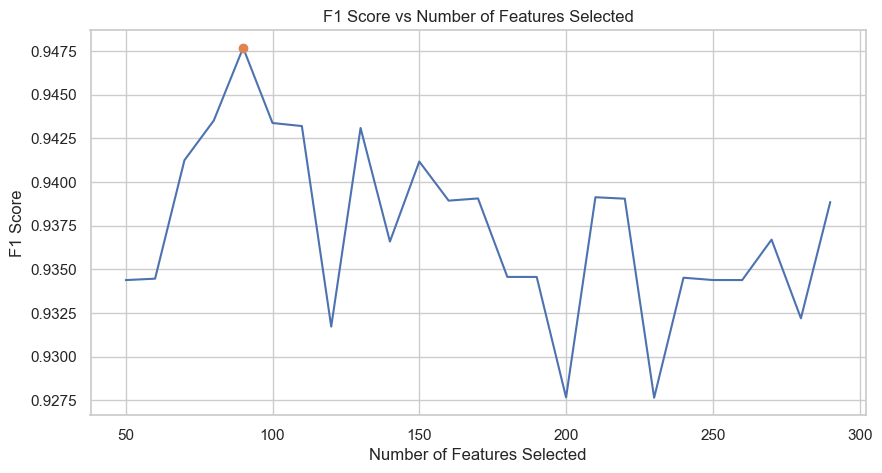

In [ ]:
n_features_range = np.arange(50, 400, 10)
f1_scores = []

for n_features in n_features_range:
    estimator = LinearSVC()
    rfe = RFE(estimator, n_features_to_select=n_features)

    rfe.fit(X_train_sample, y_train_sample)
    selected_features = X.columns[rfe.support_]
    estimator.fit(X_train_sample[selected_features], y_train_sample)
    y_pred = estimator.predict(X_test_sample[selected_features])
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))

print(n_features_range[np.argmax(f1_scores)])

plt.figure(figsize=(10, 5))
plt.plot(n_features_range, f1_scores)
plt.plot(n_features_range[np.argmax(f1_scores)], max(f1_scores), marker="o")
plt.xlabel("Number of Features Selected")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Number of Features Selected")
plt.grid(True)
plt.show()

### Variance Threshold

0.9900000000000002


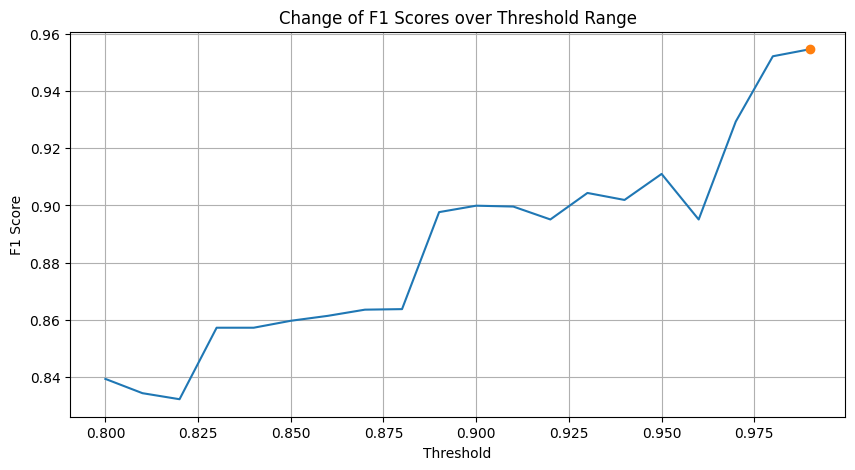

In [ ]:
corr_matrix = X_train.corr().abs()
threshold_range = np.arange(0.8, 1.0, 0.01)
f1_scores = []
for threshold in threshold_range:
    correlated_features = []
    n_features = corr_matrix.shape[1]
    columns = corr_matrix.columns

    for i in range(n_features):
        for j in range(i + 1, n_features):
            if corr_matrix.iloc[i, j] >= threshold:
                correlated_features.append((columns[i], columns[j]))

    correlated_features = list(
        set([item for sublist in correlated_features for item in sublist])
    )
    X_vt_selected = X_train_sample.drop(correlated_features, axis=1)

    model = LogisticRegression()
    model.fit(X_vt_selected, y_train_sample)
    y_pred = model.predict(X_test_sample.drop(correlated_features, axis=1))
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))
print(threshold_range[np.argmax(f1_scores)])

plt.figure(figsize=(10, 5))
plt.plot(threshold_range, f1_scores)
plt.plot(threshold_range[np.argmax(f1_scores)], max(f1_scores), marker="o")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("Change of F1 Scores over Threshold Range")
plt.grid(True)
plt.show()

0.9900000000000002


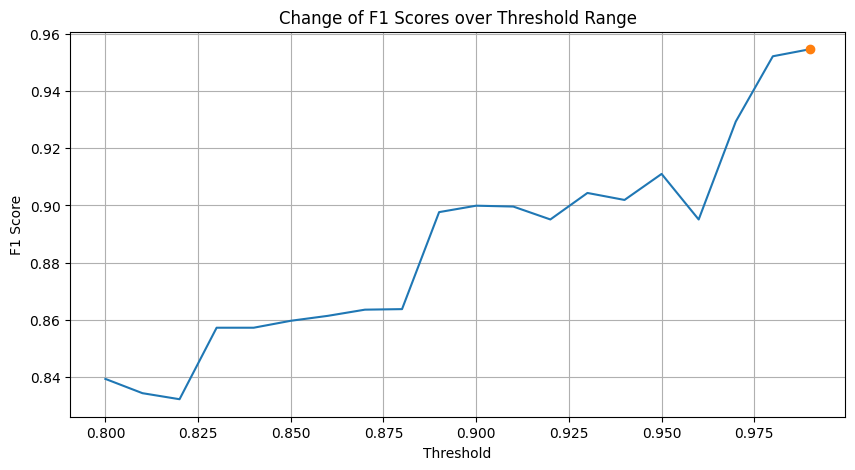

In [ ]:
corr_matrix = X_train.corr().abs()
threshold_range = np.arange(0.8, 1.0, 0.01)
f1_scores = []
for threshold in threshold_range:
    correlated_features = []
    n_features = corr_matrix.shape[1]
    columns = corr_matrix.columns

    for i in range(n_features):
        for j in range(i + 1, n_features):
            if corr_matrix.iloc[i, j] >= threshold:
                correlated_features.append((columns[i], columns[j]))

    correlated_features = list(
        set([item for sublist in correlated_features for item in sublist])
    )
    X_vt_selected = X_train_sample.drop(correlated_features, axis=1)

    model = LinearSVC()
    model.fit(X_vt_selected, y_train_sample)
    y_pred = model.predict(X_test_sample.drop(correlated_features, axis=1))
    f1_scores.append(f1_score(y_test_sample, y_pred, average="weighted"))
print(threshold_range[np.argmax(f1_scores)])

plt.figure(figsize=(10, 5))
plt.plot(threshold_range, f1_scores)
plt.plot(threshold_range[np.argmax(f1_scores)], max(f1_scores), marker="o")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("Change of F1 Scores over Threshold Range")
plt.grid(True)
plt.show()

### Principal Component Analysis

170


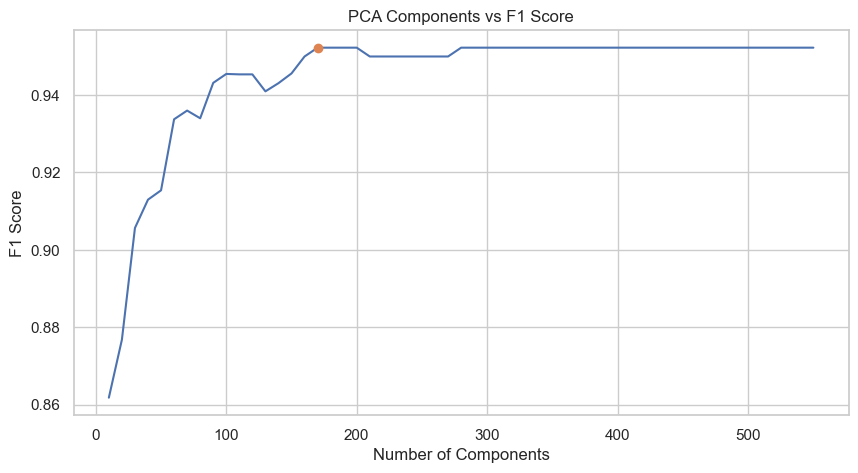

In [ ]:
n_components_list = range(10, 560, 10)
f1_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_sample)

    X_train_pca = pca.transform(X_train_sample)
    X_test_pca = pca.transform(X_test_sample)

    model = LogisticRegression()
    model.fit(X_train_pca, y_train_sample)

    y_pred_pca = model.predict(X_test_pca)
    f1_scores.append(f1_score(y_test_sample, y_pred_pca, average="weighted"))

print(n_components_list[np.argmax(f1_scores)])

plt.figure(figsize=(10, 5))
plt.plot(n_components_list, f1_scores)
plt.plot(n_components_list[np.argmax(f1_scores)], max(f1_scores), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("F1 Score")
plt.title("PCA Components vs F1 Score")
plt.show()

270


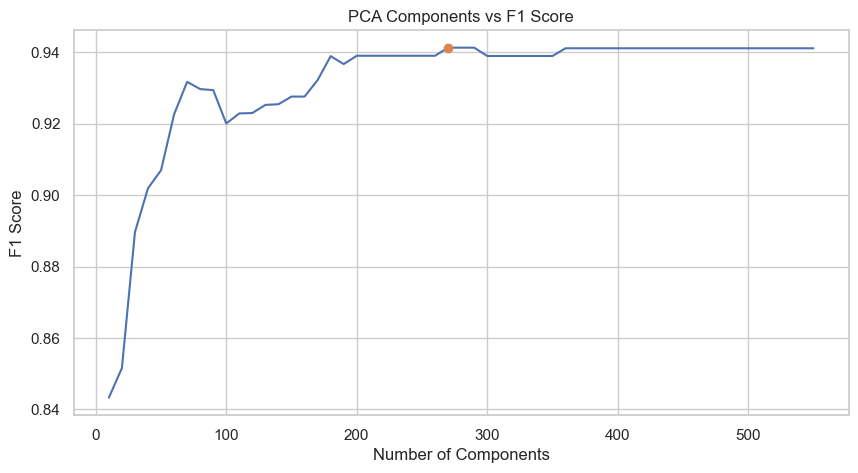

In [ ]:
n_components_list = range(10, 560, 10)
f1_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_sample)

    X_train_pca = pca.transform(X_train_sample)
    X_test_pca = pca.transform(X_test_sample)

    model = LinearSVC()
    model.fit(X_train_pca, y_train_sample)

    y_pred_pca = model.predict(X_test_pca)
    f1_scores.append(f1_score(y_test_sample, y_pred_pca, average="weighted"))

print(n_components_list[np.argmax(f1_scores)])

plt.figure(figsize=(10, 5))
plt.plot(n_components_list, f1_scores)
plt.plot(n_components_list[np.argmax(f1_scores)], max(f1_scores), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("F1 Score")
plt.title("PCA Components vs F1 Score")
plt.show()

### PCA + RFE

In [ ]:
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=100)
rfe.fit(X_train_sample, y_train_sample)
selected_features = X_train_sample.columns[rfe.support_]
X_train_rfe_sample = X_train_sample[selected_features]
X_test_rfe_sample = X_test_sample[selected_features]

Best Number of Components: 70


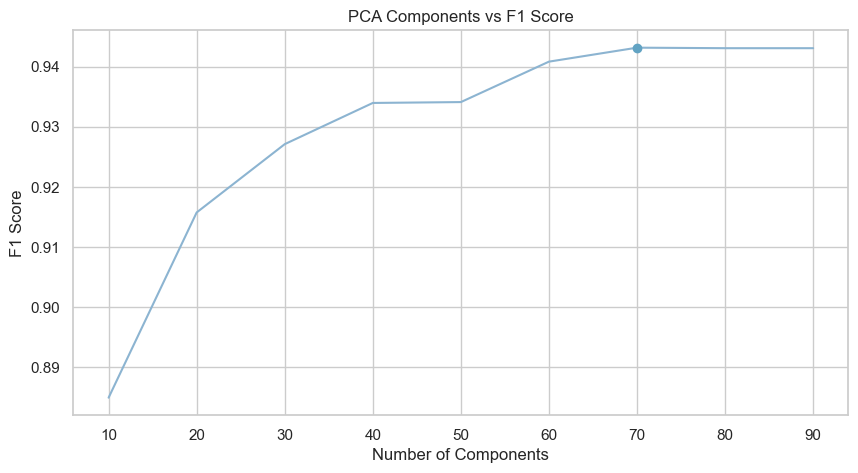

In [ ]:
n_components_list = range(10, 100, 10)
f1_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)

    X_train_rfepca = pca.fit_transform(X_train_rfe_sample)
    X_test_rfepca = pca.transform(X_test_rfe_sample)

    model = LogisticRegression()
    model.fit(X_train_rfepca, y_train_sample)

    y_pred_rfepca = model.predict(X_test_rfepca)
    f1_scores.append(f1_score(y_test_sample, y_pred_rfepca, average="weighted"))

print(f"Best Number of Components: {n_components_list[np.argmax(f1_scores)]}")
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, f1_scores)
plt.plot(n_components_list[np.argmax(f1_scores)], max(f1_scores), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("F1 Score")
plt.title("PCA Components vs F1 Score")
plt.show()

Best Number of Components: 70


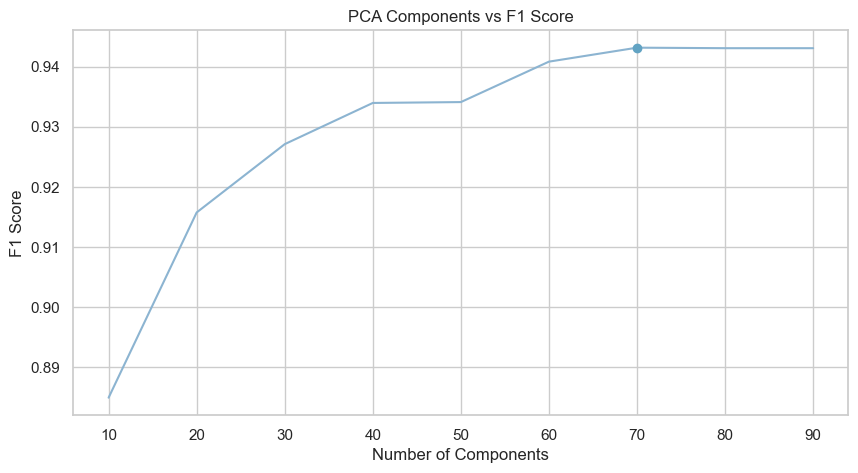

In [ ]:
n_components_list = range(10, 100, 10)
f1_scores = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)

    X_train_rfepca = pca.fit_transform(X_train_rfe_sample)
    X_test_rfepca = pca.transform(X_test_rfe_sample)

    model = LogisticRegression()
    model.fit(X_train_rfepca, y_train_sample)

    y_pred_rfepca = model.predict(X_test_rfepca)
    f1_scores.append(f1_score(y_test_sample, y_pred_rfepca, average="weighted"))

print(f"Best Number of Components: {n_components_list[np.argmax(f1_scores)]}")
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, f1_scores)
plt.plot(n_components_list[np.argmax(f1_scores)], max(f1_scores), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("F1 Score")
plt.title("PCA Components vs F1 Score")
plt.show()